#1. Introduction


In [ ]:
# Importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We read the dataset and then print the first five rows to observe data, the features and their type.

In [ ]:
# Read the data to the dataframe df.
df = pd.read_csv("dataset.csv")

# Display the first five rows of the dataset.
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,top1_behavior_skill_score,top2_behavior_skill_score,top3_behavior_skill_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,0.931689,0.662042,0.752463,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0.352093,0.132231,0.316905,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0.052347,0.089765,0.254859,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0.309913,0.289758,0.440784,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,0.497929,0.397544,0.392760,1


In [ ]:
# Define empty list for stroing all features names
features_names = []
for col in df.columns:
  features_names.append(col)
  print(col)

years_of_experience
functional_competency_score
top1_skills_score
top2_skills_score
top3_skills_score
behavior_competency_score
top1_behavior_skill_score
top2_behavior_skill_score
top3_behavior_skill_score
call_for_interview


In [ ]:
df.shape

(300, 10)

So, we have total 300 observations and 10 features. Overall, the data is numerical but the call for interview, the target variable, is categorical. The decision to call the candidate for interview is shown by 1, and not to be called by 0.

## 2.1 Data Visualisation
We will plot a box plot for the features in the dataset to see and analyze how they are distributed. 

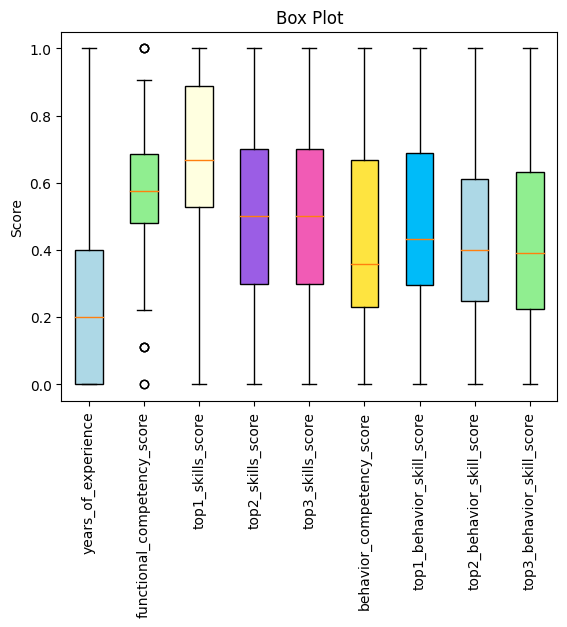

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()


# Define colors scheme for the graphs
color_codes = ['lightblue', 'lightgreen', 'lightyellow', '#9b5de5', '#f15bb5', '#fee440', '#00bbf9',
              'lightblue', 'lightgreen', 'lightyellow',]


# Remove the response variable column from the columns
response_variable = 'call_for_interview'  
features_to_plot = [col for col in df.columns if col != response_variable]
df_plot = df[features_to_plot]

# Plot the box plot using Matplotlib directly
boxplot = ax.boxplot(df_plot, patch_artist=True)

  # Change the fill color of the boxes
for patch, color in zip(boxplot['boxes'], color_codes[0:9]):
    patch.set_facecolor(color)

# Customize the plot
#ax.set_ylim(-0.25, 1.25)
ax.set_ylabel('Score')
ax.set_title('Box Plot')
#ax.grid(True)
ax.set_xticklabels(features_to_plot)
plt.xticks(rotation=90)
# Show the plot
plt.show()

The top1_skills_score has the largest median among all the features, while the years_of_experience have the lowest median. The top2_skills_score and top3_skills_score have almost same median score. The behavior competency score and top three behavior skills have almost same median. Moreover, only the functional competency score has outliers.

Now we will see the percentages of the students who are called for interiew and who are not.

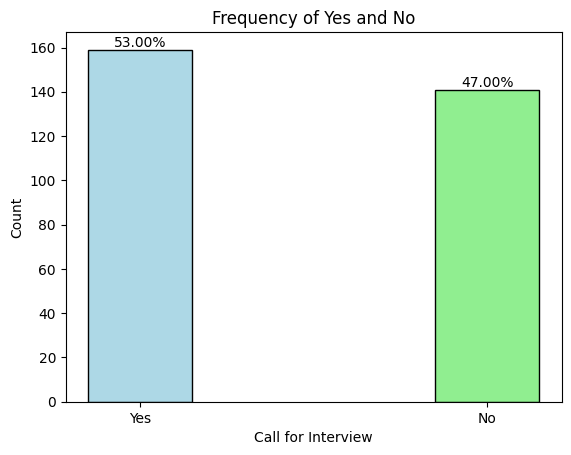

In [ ]:

# Call_for_interview should be yes or no
labels = ['Yes', 'No']
values = df['call_for_interview'].value_counts()

# Calculate total sum
total = sum(values)
# Calculate percentages
percentages = [(value/total) * 100 for value in values]

# Add percentage labels to the bars
for i, value in enumerate(values):
    percentage = f'{percentages[i]:.2f}%'
    plt.text(i, value, percentage, ha='center', va='bottom')

# Plotting the bar chart
plt.bar(labels, values, color = color_codes[0:2], align='center', width=0.3, edgecolor='black', linewidth=1)

# Label the axis and give the title to the graph
plt.xlabel('Call for Interview')
plt.ylabel('Count')
plt.title('Frequency of Yes and No')
# Display the plot
plt.show()


#3. Data Preparation
After data exploration and visualization, the nextstep is to prepare the data for analysis and for training the model. For this we need to do preprocessing of the data which address issues such as missing values, outliers, encoding of variables and feature selection/engineering.

##3.1 Data Transfromation
Since computer deal only with numbers, therefore data transfromation is needed when the dataset contains non-numeric data, such as categorical variables or text. In our dataset all the features have numerical values, even the catagorical variable call_for_interview (Yes, No) is given as numeric variable (1, 0) respectively. Therefore, transformation is not required.

##3.2 Data Cleaning:
To clean our data, we will:
* Remove duplicates rows if there is any.
* Check and handle missing values in the dataset.
* Examine the data types of each column and ensure they are correctly assigned.

In [ ]:
# Check if there are any missing value in these.
# Sum them up for each column
df.isna().sum()

years_of_experience            0
functional_competency_score    0
top1_skills_score              0
top2_skills_score              0
top3_skills_score              0
behavior_competency_score      0
top1_behavior_skill_score      0
top2_behavior_skill_score      0
top3_behavior_skill_score      0
call_for_interview             0
dtype: int64

The result of the code chunk above shows there are no missing values in the columns.

Now we need to check if there are duplicate observations in the dataframe and sum them up to get the total number of duplicated rows.

In [ ]:
# This will check the duplicate observations in the dataset
df.duplicated().sum()

0

Hence, the total observations are uniqe and there no duplication of observations.

Next we need to check the data types of our features.

In [ ]:
# Check the data types of each columns in df.
df.dtypes

years_of_experience            float64
functional_competency_score    float64
top1_skills_score              float64
top2_skills_score              float64
top3_skills_score              float64
behavior_competency_score      float64
top1_behavior_skill_score      float64
top2_behavior_skill_score      float64
top3_behavior_skill_score      float64
call_for_interview               int64
dtype: object

It is clear that all the data types are correctly assigned and there is no need for any correction.

As discussed earlier, there are outliers in the functional competancy score that needs to be removed.

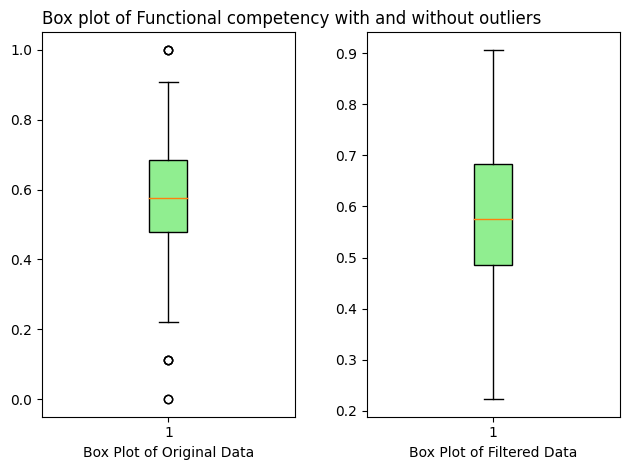

In [ ]:

data_to_plot = df['functional_competency_score']

# Visualize original data using a box plot
plt.subplot(1, 2, 1)

plt.title("Box plot of Functional competency with and without outliers", loc="left")
plt.boxplot(data_to_plot, patch_artist=True, boxprops = {'facecolor' : color_codes[1]})
plt.xlabel("Box Plot of Original Data")
# Identify outliers using box plot
q1 = np.percentile(data_to_plot , 25)
q3 = np.percentile(data_to_plot , 75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = (data_to_plot  < q1 - threshold) | (data_to_plot  > q3 + threshold)

# Remove outliers from the functional comptency columns
filtered_data = data_to_plot [~outliers]


# Visualize filtered data using a box plot
plt.subplot(1, 2, 2)
plt.boxplot(filtered_data, patch_artist=True, boxprops = {'facecolor' : color_codes[1]})
plt.xlabel("Box Plot of Filtered Data")
# Remove outliers from the dataset
df = df[~outliers]
plt.tight_layout()
plt.show()


## 3.3 Features Selection

When it comes to feature selection, understanding the correlation between variables is key. When two variables are highly correlated, they tend to change together in a predictable manner. Therfore, we will drop those features  to avoid redunduncy and improve the model's performance.

In [ ]:
# Print the names of all the features in dataset

for col in df.columns:
  print(col)

years_of_experience
functional_competency_score
top1_skills_score
top2_skills_score
top3_skills_score
behavior_competency_score
top1_behavior_skill_score
top2_behavior_skill_score
top3_behavior_skill_score
call_for_interview


Now we have to plot the correlation of all the features including response variable to check which features are correlated loosely or strongly with it, so only high correlated features are selected for the model building. Plus, they also shows which features are important in deciding whether an applicant would be called for an interview or not. Thus, giving an answer to our first question and objective of this project.

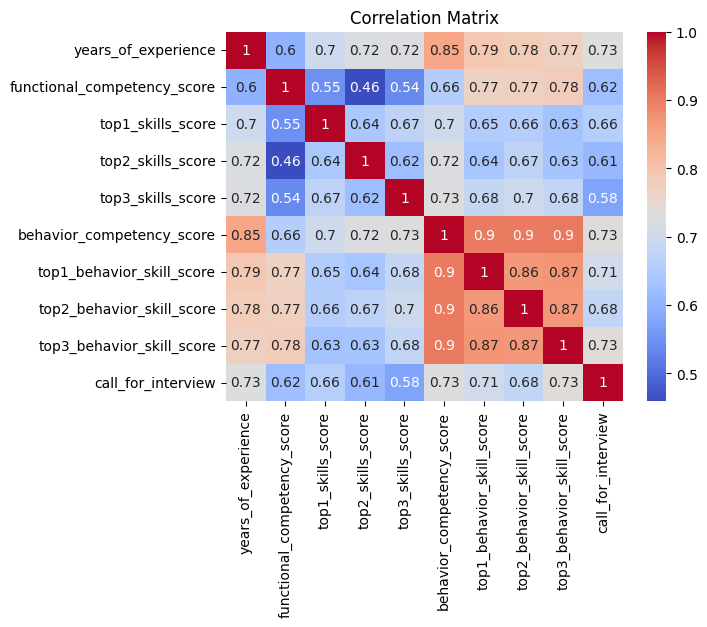

In [ ]:
# Create a heatmap with the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# Set the plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

Follwoing are the observations of the correlation matrix:

1. Years of experience and behavior competency score are highly  correlated with cresponse variable.
2. Years of experience is also highly correlated behavior competency scores.


Next, we will drop the features which are highly correlated with each other. For this I have set the threshold value for correlation coefficient greater than 0.85.

In [ ]:
# Identify highly correlated features
correlation_matrix = df.drop("call_for_interview", axis = 1)
correlation_matrix = correlation_matrix.corr()
# Set threshold
corr_threshold = 0.85 
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname_i = correlation_matrix.columns[i]
            colname_j = correlation_matrix.columns[j]
            high_corr_features.add(colname_i)
            high_corr_features.add(colname_j)

In [ ]:
high_corr_features

{'behavior_competency_score',
 'top1_behavior_skill_score',
 'top2_behavior_skill_score',
 'top3_behavior_skill_score'}

The above features are highly correlated with each other and have correlation coefficient more that 0.85. Therefore, we will drop three and choose one of them. Sicne the behavior competency has the highest correlation with call of interview, therefore we will keep it.

In [ ]:
# Drop the mentioned columns fromthe dataset
df= df.drop(['top1_behavior_skill_score','top2_behavior_skill_score','top3_behavior_skill_score'],  axis = 1)

In [ ]:
# Confirm the data
df.head()

,years_of_experience,functional_competency_score,top1_skills_score,top2_skills_score,top3_skills_score,behavior_competency_score,call_for_interview
0,0.333333,0.749498,0.777778,0.7,0.8,0.769231,1
1,0.133333,0.490638,0.777778,0.3,0.4,0.153846,0
2,0.000000,0.460256,0.444444,0.3,0.3,0.051282,0
3,0.000000,0.507347,0.555556,0.4,0.5,0.384615,0
4,0.400000,0.662020,0.666667,0.7,0.5,0.461538,1


#4. Model training
I have used nine classification models for training and I will choose one of them based on the evaluation metrics.

In [ ]:

# Importing sklearn libraries for model training
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Different classification Models
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Importing  libraries 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import log_loss, accuracy_score, precision_score, recall_score, matthews_corrcoef, f1_score



As our response variable is a decision variable, hence assign features colomns to X and decision variable to y. Also, split the dataset into training data (80%) and testing data (20%).

In [ ]:

X = df.drop("call_for_interview", axis = 1)
y = df["call_for_interview"]

# scaling the data
ss = StandardScaler()
X = ss.fit_transform(X) #check why and also stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Next, we train the model with different classifiers on the training dataset. Moreover, we test the trained classifiers on the test dataset.

To choose the best model among the trained models, we will use the f1 score, accuracy, and log loss.

In [ ]:
# Define the list of models
models = [
    KNeighborsClassifier(n_neighbors=3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]


# Logging for Visual Comparison
log_cols = ["Classifier", "Accuracy", "Log Loss", "F1 Score"]
log = pd.DataFrame(columns=log_cols)

for model in models:
    name = model.__class__.__name__
    print("*" * 40)
    print(name)

    # Perform cross-validation
    train_predictions = cross_val_predict(model, X_train, y_train, cv=5)

    # Calculate precision, recall, PPV, NPV, MCC, and F1 score
    precision = precision_score(y_train, train_predictions, average="macro")
    recall = recall_score(y_train, train_predictions, average="macro")
    f1 = f1_score(y_train, train_predictions, average="macro")
    ppv = precision_score(y_train, train_predictions, average=None)
    npv = recall_score(y_train, train_predictions, average=None)
    mcc = matthews_corrcoef(y_train, train_predictions)

    # Print the evaluation metrics
    print("==== Training Set Results ====")
    print("Precision: {:.2%}".format(precision))
    print("Recall: {:.2%}".format(recall))
    print("F1 Score: {:.2%}".format(f1))
    print("PPV (Precision):", ppv)
    print("NPV (Recall):", npv)
    print("MCC: {:.2}".format(mcc))

    # Fit the model on the training set and calculate metrics on the test set
    model.fit(X_train, y_train)

    test_predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, test_predictions)
    f1_test = f1_score(y_test, test_predictions, average="macro")

    test_predictions_proba = model.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions_proba)

    log_entry = pd.DataFrame([[name, accuracy * 100, ll, f1_test]], columns=log_cols)
    log = pd.concat([log, log_entry], ignore_index=True)

print("*" * 40)
print("Testing Results for each Classifier:")
print(log)


****************************************
KNeighborsClassifier
==== Training Set Results ====
Precision: 89.26%
Recall: 89.06%
F1 Score: 88.84%
PPV (Precision): [0.84126984 0.94392523]
NPV (Recall): [0.94642857 0.83471074]
MCC: 0.78
****************************************
SVC
==== Training Set Results ====
Precision: 90.91%
Recall: 90.05%
F1 Score: 89.67%
PPV (Precision): [0.82835821 0.98989899]
NPV (Recall): [0.99107143 0.80991736]
MCC: 0.81
****************************************
NuSVC
==== Training Set Results ====
Precision: 91.55%
Recall: 90.88%
F1 Score: 90.54%
PPV (Precision): [0.84090909 0.99009901]
NPV (Recall): [0.99107143 0.82644628]
MCC: 0.82
****************************************
DecisionTreeClassifier
==== Training Set Results ====
Precision: 86.30%
Recall: 86.35%
F1 Score: 86.26%
PPV (Precision): [0.83898305 0.88695652]
NPV (Recall): [0.88392857 0.84297521]
MCC: 0.73
****************************************
RandomForestClassifier
==== Training Set Results ====
Precisi

We can see the from the table above that logistic regresion and quadratic discriminant analysis have are the two top models on the bases of slected matrics. 
 

To better summarize the results of the classiffier on the test data, we plot the results table above.

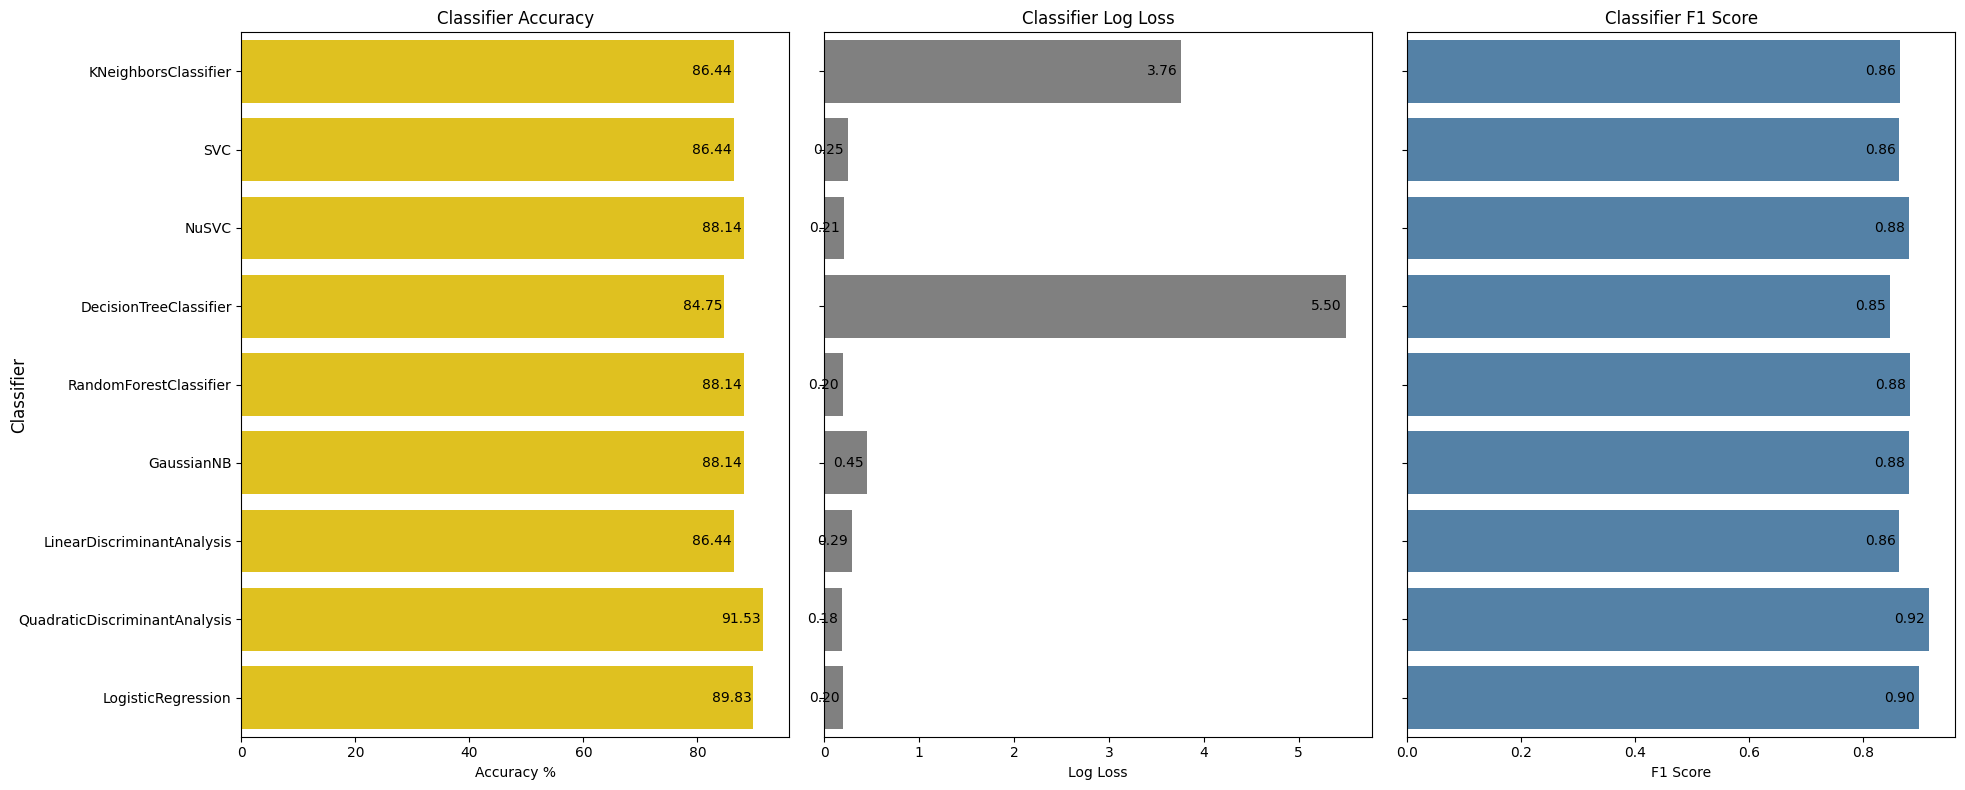

In [ ]:

# Plot the Accuracy, Log Loss, and F1 Score
fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 8))

plt.subplot(1, 3, 1)
sns.set_color_codes("muted")
c = sns.barplot(x='Accuracy', y='Classifier', data=log, color="gold")
c.set(ylabel=None)
c.bar_label(c.containers[0], padding=-30, fmt='%.2f')
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')

plt.subplot(1, 3, 2)
sns.set_color_codes("muted")
l = sns.barplot(x='Log Loss', y='Classifier', data=log, color="grey")
l.set(ylabel=None)
l.bar_label(l.containers[0], padding=-25, fmt='%.2f')
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')

plt.subplot(1, 3, 3)
sns.set_color_codes("muted")
f = sns.barplot(x='F1 Score', y='Classifier', data=log, color="steelblue")
f.set(ylabel=None)
f.bar_label(f.containers[0], padding=-25, fmt='%.2f')
plt.xlabel('F1 Score')
plt.title('Classifier F1 Score')

fig.supylabel('Classifier')
plt.tight_layout()
plt.show()


Qudaratic Discriminant Analysis has the highest accuracy, less log loss and highest f1 score. The second best model is logistic regression based on accuracy, log loss, and f1 score. My model of choice is logistic regression because I want to know which features are important for our prediction model.

For checking which features are most important for the predictin in the model, I trained the logistic regression model agian.




In [ ]:
# Create and fit a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)


Now we calculate the featrures importance and then sort features on the bases of the featrues importance score.



In [ ]:
# Extract feature importance
importances = logreg.coef_[0]
# Sort feature importance scores
sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

features = ['years_of_experience', 'functional_competency_score',
       'top1_skills_score', 'top2_skills_score', 'top3_skills_score',
       'behavior_competency_score']
# Convert sorted_indices to a list before indexing features
sorted_features = [features[i] for i in sorted_indices]

In order to show the importance of the featuresand their score, we draw a bar plot for them.

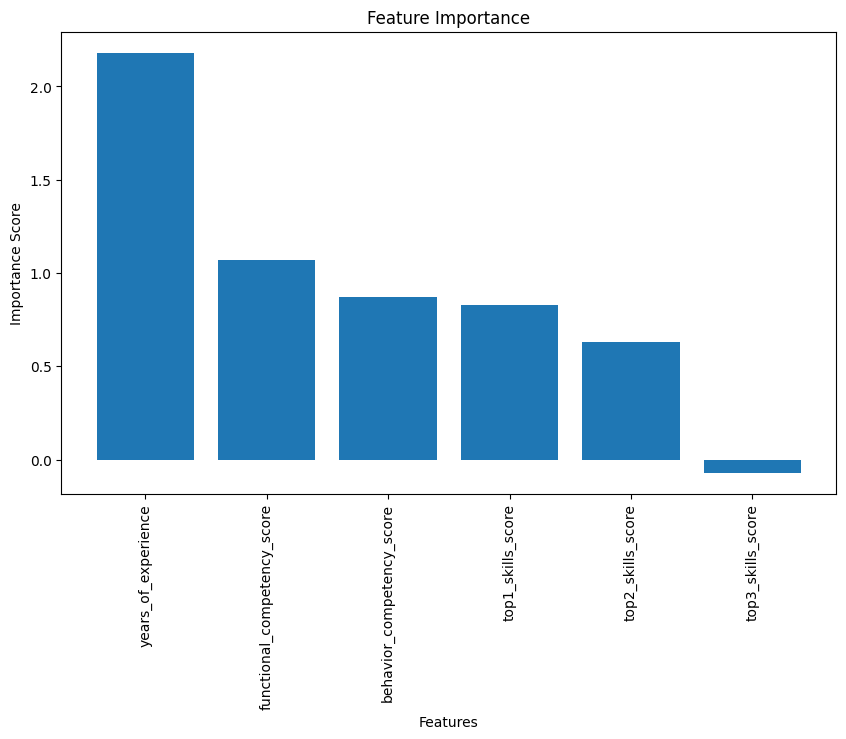

In [ ]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances)
plt.xticks(range(len(sorted_importances)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.show()

# 5. Conclusion
The following is the conclusion of this project:

- The most important features based on which the HR call a candidate for an interview is the years of experience, the functional competency score, and is the behavior competency score.
- Logistic regression, a machine learning model, can predict within 90% accuracy wheater a candidate to be called for interview or not.